# Implementing PLS

We're going to implement PLS in about 20 lines of Python code.

## Loading the necessary packages and functions

In [1]:
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

## Defining a function to plot the results

You don't have to do anything here.

In [ ]:
def plot_results(y, y_pred):
    # Calculate R-squared
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y, y_pred, color="b")
    plt.plot([min(y), max(y)], [min(y), max(y)], "r--", label="Ideal Fit")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs. Predicted Values\nR-squared = {r_squared:.2f}")
    plt.legend()
    plt.show()

## Loading and preprocessing the data

In [ ]:
data_set = load_diabetes()
X = data_set.data
y = data_set.target
feature_names = data_set.feature_names

# Now let's standardise the data
X = (X - X.mean(axis=0)) / X.std(axis=0)
y = (y - y.mean()) / y.std()

## Implementing a function that performs the PLS

In [ ]:
def pls_train(X, y, n_components):
    # Here, we initialize all the required matrices.
    # Note: As we only want to support one response variable, B is 1-dimensional.
    T = np.zeros((X.shape[0], n_components))
    V = np.zeros((X.shape[1], n_components))
    W = np.zeros((X.shape[1], n_components))
    B = np.zeros(n_components)

    for i in range(n_components):
        # Here we compute the covariances (w) between all inputs and the response.
        w = X.T @ y

        # Now let's normalize the covariance matrix
        w /= np.linalg.norm(w)

        # Calculate scores
        z = X @ w

        # Calculate loadings
        v = (X.T @ z) / (z @ z.T)

        # Calculate regression coefficient
        b = (y.T @ z) / (z.T @ z)

        # Add the calculated values to the respective matrices.
        T[:, i] = z
        V[:, i] = v
        W[:, i] = w
        B[i] = b

        # Here we update X and y for the next round.
        # Note, we use np.outer(z, v) instead of z @ v.T because the way numpy
        # handels the matrices. Mathematically, the two are the same for our
        # purposes.
        X = X - np.outer(z, v)
        y = y - b * z

    return T, V, W, B

As we want to make predictions, we will have to also implement a method that does this. Note, that we also need to supply the mean of the features and the response, so that everything is scaled correctly. Alternatively, we could pre-scale all our data.

In [ ]:
def pls_predict(X, W, C):
    T_new = X @ W
    y_pred = T_new @ C

    return y_pred

## Performing the PLS and evaluate the training accuracy

In [ ]:
T, V, W, C = pls_train(X, y, 2)

In [ ]:
y_pred = pls_predict(X, W, C)

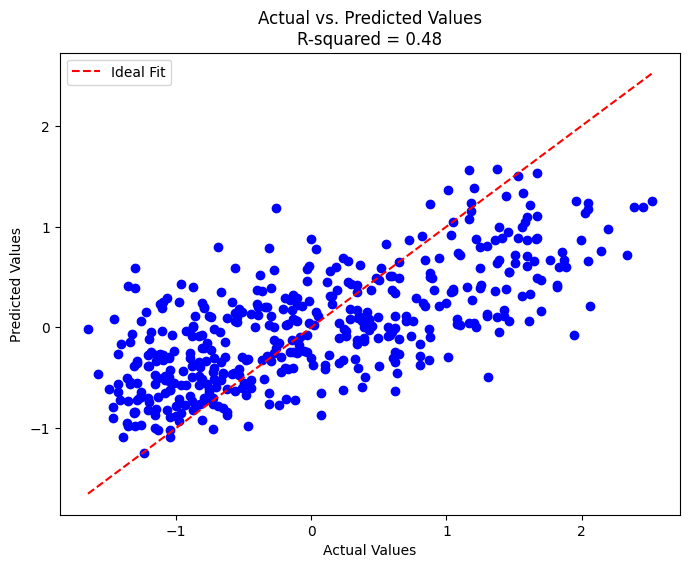

In [ ]:
plot_results(y, y_pred)